# 주요관광지 근처의 지하철역 기준으로 분석

1. 1호선 : 괴정/하단/토성/자갈치/남포/범어사
2. 2호선 : 장산/동백/센텀시티/광안/경성대부경대

* 도시철도로 떠나는 부산여행 참조
* https://jsksoft.tistory.com/13422

In [1]:
import pandas as pd
#시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#prj1에서 저장한 dfg2 엑셀파일 읽어오기
data= pd.read_excel('./data2/부산일자별도시철도이용객수.xlsx') 

In [3]:
data.head()

,Unnamed: 0,년월일,역번호,역명,이용객수
0,0,2018-01-01,100,동매,1972.5
1,1,2018-01-01,101,신평,3783.5
2,2,2018-01-01,102,하단,11380.5
3,3,2018-01-01,103,당리,3385.0
4,4,2018-01-01,104,사하,2593.5


In [4]:
#열삭제 
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39659 entries, 0 to 39658
Data columns (total 4 columns):
년월일     39659 non-null datetime64[ns]
역번호     39659 non-null int64
역명      39659 non-null object
이용객수    39659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
data.head()

,년월일,역번호,역명,이용객수
0,2018-01-01,100,동매,1972.5
1,2018-01-01,101,신평,3783.5
2,2018-01-01,102,하단,11380.5
3,2018-01-01,103,당리,3385.0
4,2018-01-01,104,사하,2593.5


In [65]:
# 역명확인후 역번호로 리스트 저장 
# 괴정/하단/토성/자갈치/남포/범어사
# 105/102/109/110/111/133/
# 장산/동백/센텀시티/해운대/광안/경성대부경대
# 201/204/206/203/209/212
data[data['역명']=='센텀시티'].head(1)

,년월일,역번호,역명,이용객수
40,2018-01-01,206,센텀시티,9985.0


### 역번호를 주면 일자별 데이터프레임 리턴하는 함수를 만들어볼까?

In [21]:
def subway_df(n) :
    df_f = data[data['역번호']== n]    #함수용 데이터프레임을 변수에 해당하는값으로 만든다.
    df_f=df_f.reset_index()
    # 컬럼명을 기존 데이터프레임에서 가져와서 변경하려면 string형태로 가져와야 한다. 
    t=df_f.loc[:0,['역명']].max().values[0] 
    df_f=df_f[['년월일','이용객수']]
    #컬럼명을 부산역으로 변경
    df_f.columns = ['년월일',t]   
    return df_f

In [22]:
subway_df(105)

,년월일,괴정
0,2018-01-01,5603.5
1,2018-01-02,10840.0
2,2018-01-03,10728.0
3,2018-01-04,10633.0
4,2018-01-05,11075.5
5,2018-01-06,9121.5
6,2018-01-07,6414.5
7,2018-01-08,10001.0
8,2018-01-09,10889.0
9,2018-01-10,10771.5


In [66]:
# 괴정/하단/토성/자갈치/남포/범어사
# 105/102/109/110/111/133/
# 장산/동백/센텀시티/해운대/광안/경성대부경대
# 201/204/206/203/209/212

df_105 = subway_df(105)
df_102 = subway_df(102)
df_109 = subway_df(109)
df_110 = subway_df(110)
df_111 = subway_df(111)
df_133 = subway_df(133)

df_201 = subway_df(201)
df_204 = subway_df(204)
df_206 = subway_df(206)
df_203 = subway_df(203)
df_209 = subway_df(209)
df_212 = subway_df(212)

In [67]:
len(df_105)

365

In [80]:
#병합 1호선 병합
df_m1=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_105,df_102),df_109),df_110),df_111),df_133)
len(df_m1)

365

In [81]:
df_m2=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_201,df_204),df_206),df_203),df_209),df_212)
len(df_m2)

365

In [82]:
df_m = pd.merge(df_m1,df_m2)

In [83]:
df_m.head()
#len(df_m)

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대
0,2018-01-01,5603.5,11380.5,4327.0,20182.0,19836.5,5596.0,9615.0,5185.5,9985.0,20348.0,11918.0,10019.0
1,2018-01-02,10840.0,18940.5,10280.5,20799.0,22986.0,8136.5,16725.5,7714.5,21127.0,12509.5,10722.0,17853.5
2,2018-01-03,10728.0,20920.0,10764.5,20951.5,22631.0,8061.5,16865.5,7757.5,20834.5,12401.5,11479.0,18431.5
3,2018-01-04,10633.0,18859.0,10593.0,21131.5,22842.5,8583.0,17173.0,7791.0,20638.0,12484.5,10528.5,18457.0
4,2018-01-05,11075.5,20248.0,10319.5,22152.5,24383.5,8146.0,17945.0,8015.5,22204.5,13064.0,10887.5,19315.0


In [84]:
##일자별로 보이기엔 데이터가 365개나 되서 많다. 주나 월단위로 해야 할것 같다.

In [85]:
df_m['월']=df_m['년월일'].dt.month
df_m.head()

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월
0,2018-01-01,5603.5,11380.5,4327.0,20182.0,19836.5,5596.0,9615.0,5185.5,9985.0,20348.0,11918.0,10019.0,1
1,2018-01-02,10840.0,18940.5,10280.5,20799.0,22986.0,8136.5,16725.5,7714.5,21127.0,12509.5,10722.0,17853.5,1
2,2018-01-03,10728.0,20920.0,10764.5,20951.5,22631.0,8061.5,16865.5,7757.5,20834.5,12401.5,11479.0,18431.5,1
3,2018-01-04,10633.0,18859.0,10593.0,21131.5,22842.5,8583.0,17173.0,7791.0,20638.0,12484.5,10528.5,18457.0,1
4,2018-01-05,11075.5,20248.0,10319.5,22152.5,24383.5,8146.0,17945.0,8015.5,22204.5,13064.0,10887.5,19315.0,1


In [86]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 14 columns):
년월일       365 non-null datetime64[ns]
괴정        365 non-null float64
하단        365 non-null float64
토성        365 non-null float64
자갈치       365 non-null float64
남포        365 non-null float64
범어사       365 non-null float64
장산        365 non-null float64
동백        365 non-null float64
센텀시티      365 non-null float64
해운대       365 non-null float64
광안        365 non-null float64
경성대부경대    365 non-null float64
월         365 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 42.8 KB


### 주는 어떻게 구하지?

In [87]:
df_m.head()

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월
0,2018-01-01,5603.5,11380.5,4327.0,20182.0,19836.5,5596.0,9615.0,5185.5,9985.0,20348.0,11918.0,10019.0,1
1,2018-01-02,10840.0,18940.5,10280.5,20799.0,22986.0,8136.5,16725.5,7714.5,21127.0,12509.5,10722.0,17853.5,1
2,2018-01-03,10728.0,20920.0,10764.5,20951.5,22631.0,8061.5,16865.5,7757.5,20834.5,12401.5,11479.0,18431.5,1
3,2018-01-04,10633.0,18859.0,10593.0,21131.5,22842.5,8583.0,17173.0,7791.0,20638.0,12484.5,10528.5,18457.0,1
4,2018-01-05,11075.5,20248.0,10319.5,22152.5,24383.5,8146.0,17945.0,8015.5,22204.5,13064.0,10887.5,19315.0,1


In [88]:
#주 추가 하기
df_m['주'] =df_m['년월일'].apply(lambda x: x.weekofyear)
df_m.head()

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월,주
0,2018-01-01,5603.5,11380.5,4327.0,20182.0,19836.5,5596.0,9615.0,5185.5,9985.0,20348.0,11918.0,10019.0,1,1
1,2018-01-02,10840.0,18940.5,10280.5,20799.0,22986.0,8136.5,16725.5,7714.5,21127.0,12509.5,10722.0,17853.5,1,1
2,2018-01-03,10728.0,20920.0,10764.5,20951.5,22631.0,8061.5,16865.5,7757.5,20834.5,12401.5,11479.0,18431.5,1,1
3,2018-01-04,10633.0,18859.0,10593.0,21131.5,22842.5,8583.0,17173.0,7791.0,20638.0,12484.5,10528.5,18457.0,1,1
4,2018-01-05,11075.5,20248.0,10319.5,22152.5,24383.5,8146.0,17945.0,8015.5,22204.5,13064.0,10887.5,19315.0,1,1


In [89]:
df_m.tail()

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월,주
360,2018-12-27,11592.0,20786.0,11540.5,22914.0,25117.5,8825.0,17003.0,7995.0,20685.5,14826.5,11082.0,19253.0,12,52
361,2018-12-28,11341.0,20902.5,10701.5,22619.0,25525.5,7890.5,17409.0,7935.5,22076.0,15487.0,11112.0,19949.5,12,52
362,2018-12-29,8464.0,16613.5,6131.0,24468.0,27219.5,6403.5,13877.5,6602.0,20419.0,16206.5,9556.0,14492.5,12,52
363,2018-12-30,6274.5,14196.5,5234.0,22064.0,25050.5,5497.5,10715.0,5065.5,17594.5,14666.0,8290.5,10770.5,12,52
364,2018-12-31,11831.0,21324.0,10617.0,30306.5,34462.5,8004.5,17016.5,8172.5,22104.0,19348.0,13013.5,18598.0,12,1


In [90]:
#요일 반영하기
df_m['요일']= df_m['년월일'].dt.weekday.replace(0,'월').replace(1,'화').replace(2,'수').replace(3,'목').replace(4,'금').replace(5,'토').replace(6,'일')
df_m.head()

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월,주,요일
0,2018-01-01,5603.5,11380.5,4327.0,20182.0,19836.5,5596.0,9615.0,5185.5,9985.0,20348.0,11918.0,10019.0,1,1,월
1,2018-01-02,10840.0,18940.5,10280.5,20799.0,22986.0,8136.5,16725.5,7714.5,21127.0,12509.5,10722.0,17853.5,1,1,화
2,2018-01-03,10728.0,20920.0,10764.5,20951.5,22631.0,8061.5,16865.5,7757.5,20834.5,12401.5,11479.0,18431.5,1,1,수
3,2018-01-04,10633.0,18859.0,10593.0,21131.5,22842.5,8583.0,17173.0,7791.0,20638.0,12484.5,10528.5,18457.0,1,1,목
4,2018-01-05,11075.5,20248.0,10319.5,22152.5,24383.5,8146.0,17945.0,8015.5,22204.5,13064.0,10887.5,19315.0,1,1,금


In [91]:
df_m.tail(10)

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월,주,요일
355,2018-12-22,10465.0,20186.5,6971.0,29511.0,35243.0,10241.0,16456.5,7743.0,26843.5,19794.0,12243.5,17400.0,12,51,토
356,2018-12-23,6857.0,16103.0,5674.0,23318.5,29327.0,5755.5,11423.5,5408.5,21316.0,15604.0,9055.0,12748.5,12,51,일
357,2018-12-24,12667.0,23425.0,11795.5,30584.5,40257.5,8638.5,18708.0,8553.0,24784.0,19690.0,13225.0,21257.5,12,52,월
358,2018-12-25,8520.0,18640.0,6262.5,31644.5,48325.0,6218.0,13968.0,5991.0,22385.0,20978.0,12448.0,15326.5,12,52,화
359,2018-12-26,12027.5,23379.0,11483.0,23604.0,25338.5,8363.0,18024.0,8211.0,21193.5,15850.0,11537.5,19348.5,12,52,수
360,2018-12-27,11592.0,20786.0,11540.5,22914.0,25117.5,8825.0,17003.0,7995.0,20685.5,14826.5,11082.0,19253.0,12,52,목
361,2018-12-28,11341.0,20902.5,10701.5,22619.0,25525.5,7890.5,17409.0,7935.5,22076.0,15487.0,11112.0,19949.5,12,52,금
362,2018-12-29,8464.0,16613.5,6131.0,24468.0,27219.5,6403.5,13877.5,6602.0,20419.0,16206.5,9556.0,14492.5,12,52,토
363,2018-12-30,6274.5,14196.5,5234.0,22064.0,25050.5,5497.5,10715.0,5065.5,17594.5,14666.0,8290.5,10770.5,12,52,일
364,2018-12-31,11831.0,21324.0,10617.0,30306.5,34462.5,8004.5,17016.5,8172.5,22104.0,19348.0,13013.5,18598.0,12,1,월


In [ ]:
#주요역별로 box plot을 확인해볼까?

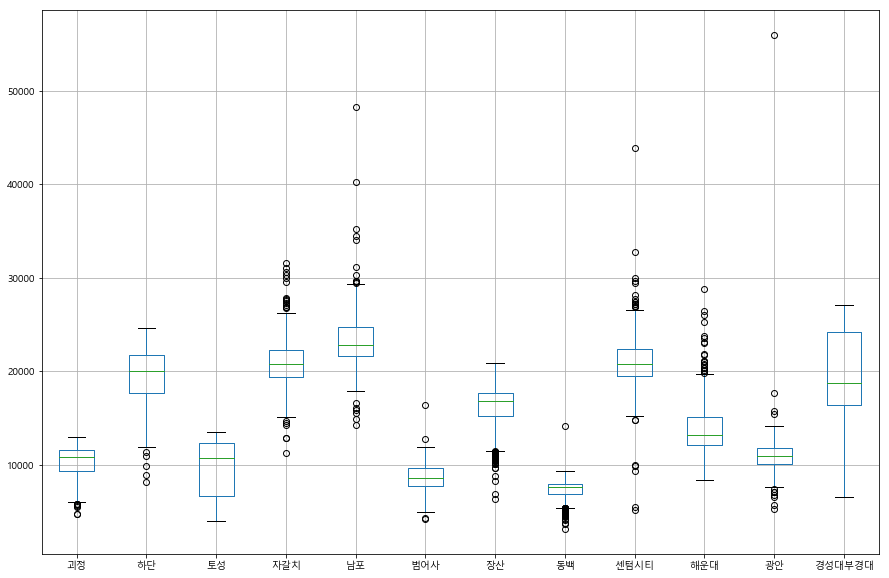

In [98]:
plt.figure(figsize=(15,10)) #크기지정
boxplot = df_m.boxplot(column=['괴정','하단','토성','자갈치','남포','범어사','장산','동백','센텀시티','해운대','광안','경성대부경대'])
plt.show()

In [110]:
df_m[df_m['광안']>50000]

,년월일,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월,주,요일
299,2018-10-27,10460.0,20142.0,7379.5,27360.0,29454.0,9635.0,20852.5,14129.5,29630.0,25238.0,55997.5,23098.5,10,43,토


## 월, 주, 요일 단위로 group by 해보자

In [99]:
#데이터프레임 구성을 일평균 이용수가 많은것과 작은것으로 나누어서 해보자
df_m.describe()
#하단, 자갈치 남포 센텀시티, 경성대부경대 

,괴정,하단,토성,자갈치,남포,범어사,장산,동백,센텀시티,해운대,광안,경성대부경대,월,주
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,10144.530137,19494.804110,9780.582192,21009.902740,23267.794521,8539.013699,15856.169863,7192.790411,20863.402740,14000.593151,10956.586301,19519.778082,6.526027,26.430137
std,1906.934793,3100.090457,2858.007132,2848.144432,3175.062645,1417.283258,2592.397211,1217.481580,3367.909622,2990.550364,2810.453130,4865.761867,3.452584,15.067565
min,4688.500000,8192.500000,3952.000000,11239.500000,14222.000000,4137.500000,6317.500000,3093.000000,5100.500000,8372.000000,5231.500000,6537.000000,1.000000,1.000000
25%,9325.000000,17655.000000,6637.500000,19412.000000,21604.000000,7704.500000,15159.000000,6913.500000,19517.500000,12076.500000,10072.500000,16402.000000,4.000000,13.000000
50%,10837.500000,20032.000000,10677.500000,20802.500000,22822.500000,8601.000000,16818.500000,7634.000000,20827.000000,13144.500000,10900.000000,18777.500000,7.000000,26.000000
75%,11568.500000,21784.500000,12299.500000,22328.000000,24723.000000,9635.000000,17642.500000,7923.500000,22389.500000,15154.000000,11805.500000,24221.500000,10.000000,39.000000
max,12999.000000,24653.500000,13533.000000,31644.500000,48325.000000,16404.000000,20852.500000,14129.500000,43898.000000,28831.500000,55997.500000,27084.500000,12.000000,52.000000


In [106]:
df_mgm1 = round(df_m.groupby('월')[['하단','자갈치','남포','센텀시티','경성대부경대']].mean())
df_mgm2 = round(df_m.groupby('월')[['장산','해운대','광안']].mean())
df_mgm3 = round(df_m.groupby('월')[['괴정','토성','범어사','동백']].mean())

In [102]:
df_mgm1

,하단,자갈치,남포,센텀시티,경성대부경대
월,,,,,
1,17942.0,20724.0,21943.0,19593.0,16304.0
2,17798.0,21544.0,22833.0,19799.0,16490.0
3,20404.0,20505.0,23459.0,20189.0,22608.0
4,20412.0,20554.0,23193.0,20494.0,21788.0
5,20448.0,21270.0,23978.0,20580.0,21954.0
6,19219.0,20237.0,22345.0,21268.0,19483.0
7,18734.0,19783.0,22662.0,21041.0,17110.0
8,18189.0,20298.0,22880.0,20995.0,16264.0
9,18895.0,20856.0,22295.0,19531.0,19385.0


In [103]:
df_mgm2

,괴정,토성,범어사,장산,동백,해운대,광안
월,,,,,,,
1,9736.0,8927.0,7464.0,15412.0,6984.0,12430.0,10328.0
2,9737.0,8718.0,8082.0,15145.0,6918.0,13194.0,10602.0
3,10336.0,10588.0,8800.0,16155.0,7123.0,12622.0,10789.0
4,10485.0,10770.0,9118.0,16277.0,7305.0,12887.0,11168.0
5,10543.0,10517.0,9229.0,16363.0,7414.0,14542.0,11376.0
6,10162.0,9681.0,8553.0,15750.0,7272.0,14055.0,11202.0
7,9973.0,9162.0,7968.0,15763.0,7133.0,15558.0,11472.0
8,9569.0,8840.0,7779.0,15397.0,7035.0,17285.0,11723.0
9,9548.0,9276.0,8873.0,14785.0,6595.0,12825.0,10186.0


In [94]:
import seaborn as sns

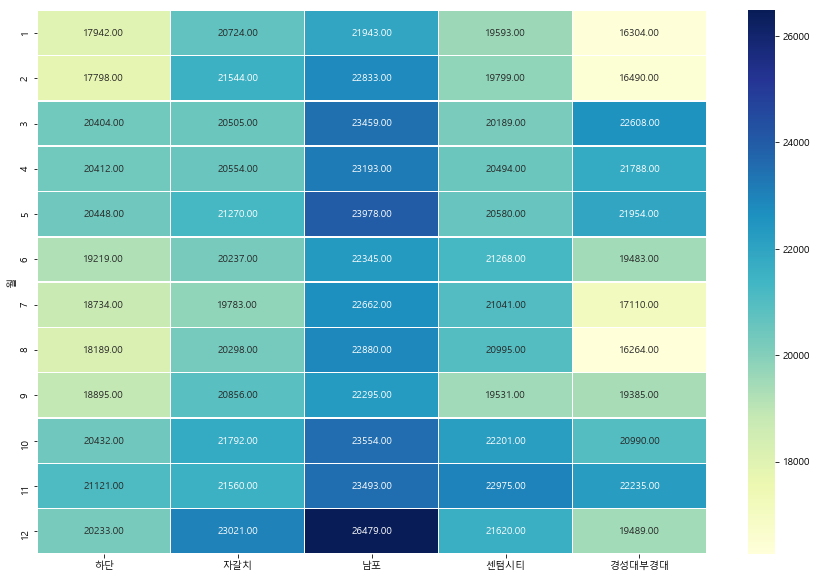

In [107]:
#월단위 시각화 : 일평균 이용객수 상위 그룹
plt.figure(figsize=(15,10))
sns.heatmap(data = df_mgm1, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

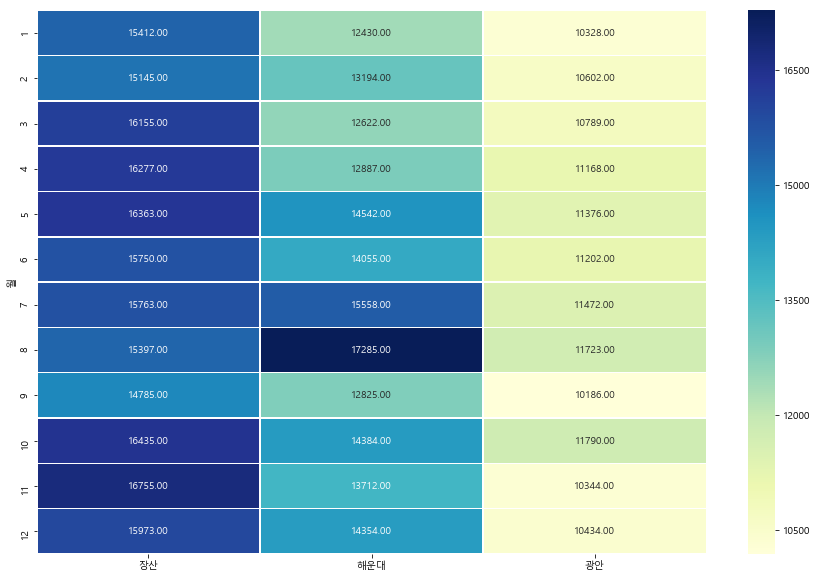

In [108]:
#월단위 시각화 : 일평균 이용객수 하위 그룹
plt.figure(figsize=(15,10))
sns.heatmap(data = df_mgm2, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

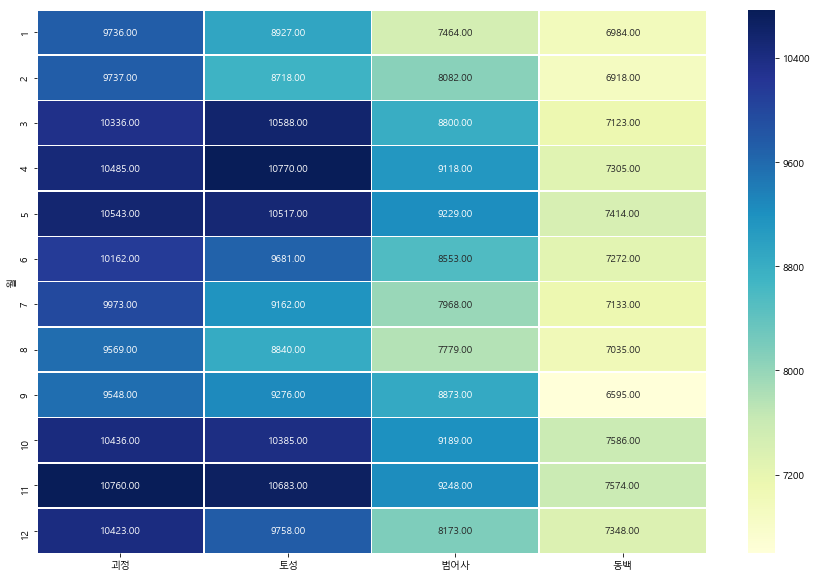

In [109]:
#월단위 시각화 : 일평균 이용객수 하위 그룹2
plt.figure(figsize=(15,10))
sns.heatmap(data = df_mgm3, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

## 1차 월단위 분석 

1. 해수욕장(여름휴가 성수기)이 아닌 전통적인 관광지가 있는 역들은 봄(3,4,5월)과 가을초겨울(9,10,11,12월)에 이용객이 많다 (자갈치/남포/하단/괴정/토성/범어사)
2. 여름휴가 기간(7~8월)에 이용객이 많은 곳은 해수욕장이 근접한 역이다 (해운대, 광안 )
3. 광안역의 경우 10월에도 평균을 상회하였는데 박스플롯 기준으로 아웃라이어 날짜는 5만명이 넘게 이용한 날로 불꽃축제 날(10/27)로 확인된다.
4. 같은 맥락으로 해운대의 아웃라이어(2만명) 기준 날짜를 보면 해운대 모래축제(5/19~22) ,여름휴가 성수기(7/28~8/18), 지스타(11/17~18) 등 특별한 이벤트가 있는날이다.

In [112]:
#주단위 이용객추이
#df_hgw = round(df_h.groupby('주')[['해운대']].mean())
df_mgw1 = round(df_m.groupby('주')[['하단','자갈치','남포','센텀시티','경성대부경대']].mean())
df_mgw2 = round(df_m.groupby('주')[['장산','해운대','광안']].mean())
df_mgw3 = round(df_m.groupby('주')[['괴정','토성','범어사','동백']].mean())


In [113]:
df_mgw1.head()

,하단,자갈치,남포,센텀시티,경성대부경대
주,,,,,
1,17817.0,22348.0,24170.0,19519.0,16039.0
2,18057.0,19784.0,21501.0,19481.0,16536.0
3,18623.0,21852.0,22596.0,20294.0,16643.0
4,17281.0,19833.0,21221.0,19498.0,16034.0
5,17951.0,21649.0,21760.0,19917.0,16072.0


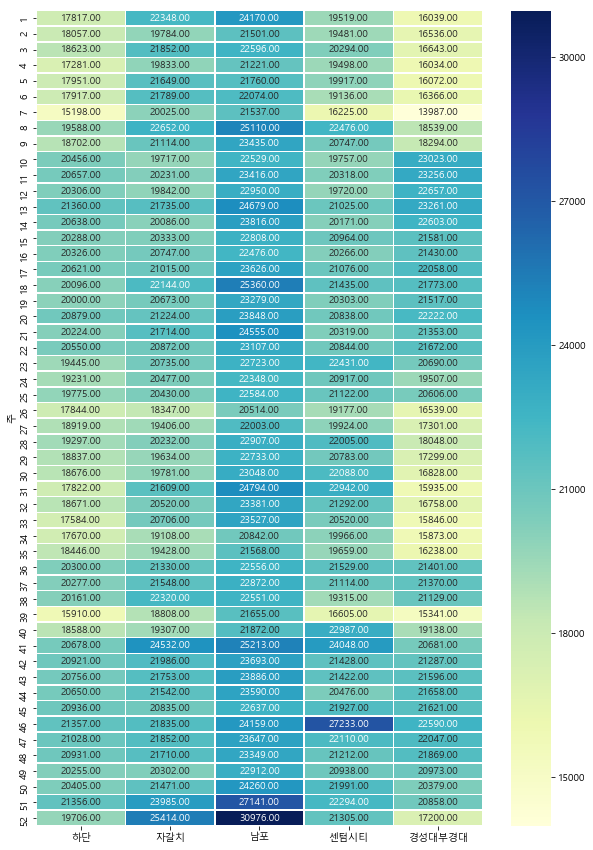

In [114]:
#52주단위 시각화
plt.figure(figsize=(10,15))
sns.heatmap(data = df_mgw1, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

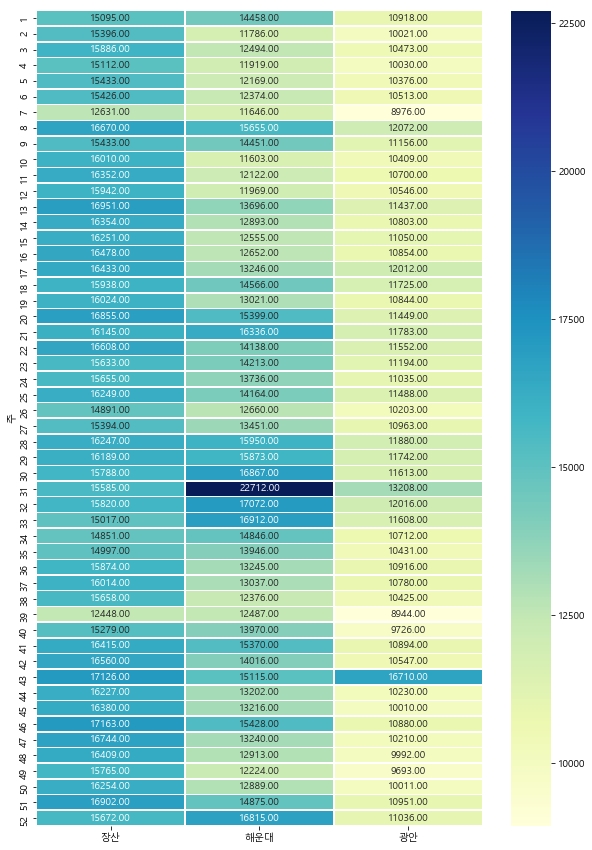

In [115]:
#52주단위 시각화
plt.figure(figsize=(10,15))
sns.heatmap(data = df_mgw2, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

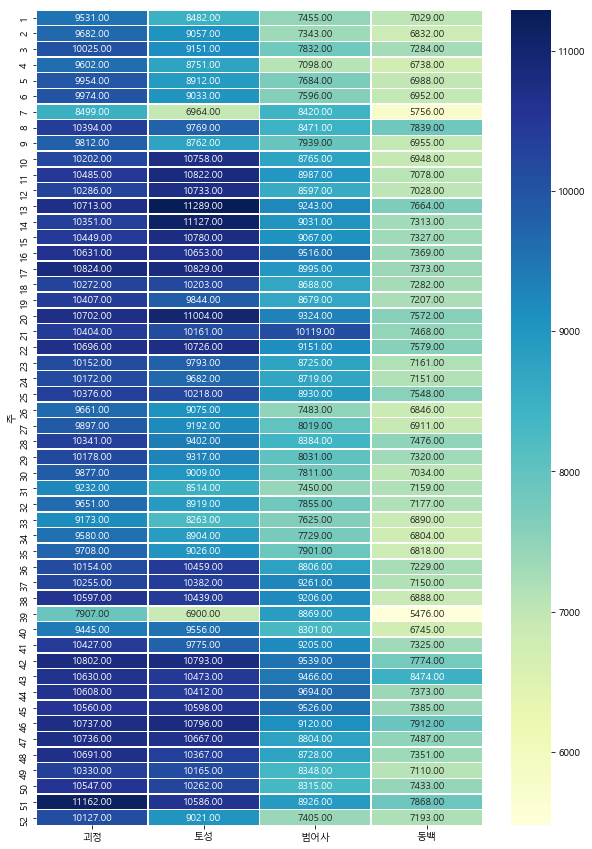

In [116]:
#52주단위 시각화
plt.figure(figsize=(10,15))
sns.heatmap(data = df_mgw3, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

In [125]:
#요일 단위 이용객추이
df_mgd = round(df_m.groupby('요일')[['하단','자갈치','남포','센텀시티','경성대부경대','장산','해운대','광안','괴정','토성','범어사','동백']].mean())
df_mgd

,하단,자갈치,남포,센텀시티,경성대부경대,장산,해운대,광안,괴정,토성,범어사,동백
요일,,,,,,,,,,,,
금,21440.0,21672.0,24460.0,22904.0,22347.0,17559.0,14843.0,11649.0,11449.0,11009.0,9204.0,7924.0
목,20198.0,20193.0,22442.0,21200.0,21886.0,16823.0,12972.0,10564.0,10917.0,11441.0,9291.0,7553.0
수,22026.0,20407.0,22636.0,20577.0,21233.0,16897.0,13090.0,11132.0,10951.0,11255.0,8820.0,7466.0
월,20106.0,20529.0,22261.0,19327.0,21065.0,16599.0,13064.0,10969.0,10892.0,11432.0,8758.0,7501.0
일,14854.0,19047.0,21531.0,17625.0,12231.0,11123.0,13544.0,9002.0,6631.0,5451.0,6545.0,5055.0
토,17698.0,24457.0,26567.0,24104.0,16496.0,15205.0,17360.0,12703.0,9263.0,6612.0,7916.0,7334.0
화,20130.0,20773.0,22997.0,20335.0,21350.0,16772.0,13149.0,10677.0,10895.0,11231.0,9235.0,7511.0


In [127]:
df_mgd=df_mgd.reset_index()
df_mgd

,요일,하단,자갈치,남포,센텀시티,경성대부경대,장산,해운대,광안,괴정,토성,범어사,동백
0,금,21440.0,21672.0,24460.0,22904.0,22347.0,17559.0,14843.0,11649.0,11449.0,11009.0,9204.0,7924.0
1,목,20198.0,20193.0,22442.0,21200.0,21886.0,16823.0,12972.0,10564.0,10917.0,11441.0,9291.0,7553.0
2,수,22026.0,20407.0,22636.0,20577.0,21233.0,16897.0,13090.0,11132.0,10951.0,11255.0,8820.0,7466.0
3,월,20106.0,20529.0,22261.0,19327.0,21065.0,16599.0,13064.0,10969.0,10892.0,11432.0,8758.0,7501.0
4,일,14854.0,19047.0,21531.0,17625.0,12231.0,11123.0,13544.0,9002.0,6631.0,5451.0,6545.0,5055.0
5,토,17698.0,24457.0,26567.0,24104.0,16496.0,15205.0,17360.0,12703.0,9263.0,6612.0,7916.0,7334.0
6,화,20130.0,20773.0,22997.0,20335.0,21350.0,16772.0,13149.0,10677.0,10895.0,11231.0,9235.0,7511.0


In [133]:
#dt.weekday.replace(0,'월').replace(1,'화').replace(2,'수').replace(3,'목').replace(4,'금').replace(5,'토').replace(6,'일')
df_mgd = df_mgd.reindex([3,6,2,1,0,5,4])
df_mgd

,요일,하단,자갈치,남포,센텀시티,경성대부경대,장산,해운대,광안,괴정,토성,범어사,동백
3,월,20106.0,20529.0,22261.0,19327.0,21065.0,16599.0,13064.0,10969.0,10892.0,11432.0,8758.0,7501.0
6,화,20130.0,20773.0,22997.0,20335.0,21350.0,16772.0,13149.0,10677.0,10895.0,11231.0,9235.0,7511.0
2,수,22026.0,20407.0,22636.0,20577.0,21233.0,16897.0,13090.0,11132.0,10951.0,11255.0,8820.0,7466.0
1,목,20198.0,20193.0,22442.0,21200.0,21886.0,16823.0,12972.0,10564.0,10917.0,11441.0,9291.0,7553.0
0,금,21440.0,21672.0,24460.0,22904.0,22347.0,17559.0,14843.0,11649.0,11449.0,11009.0,9204.0,7924.0
5,토,17698.0,24457.0,26567.0,24104.0,16496.0,15205.0,17360.0,12703.0,9263.0,6612.0,7916.0,7334.0
4,일,14854.0,19047.0,21531.0,17625.0,12231.0,11123.0,13544.0,9002.0,6631.0,5451.0,6545.0,5055.0


In [134]:
df_mgd=df_mgd.set_index('요일')

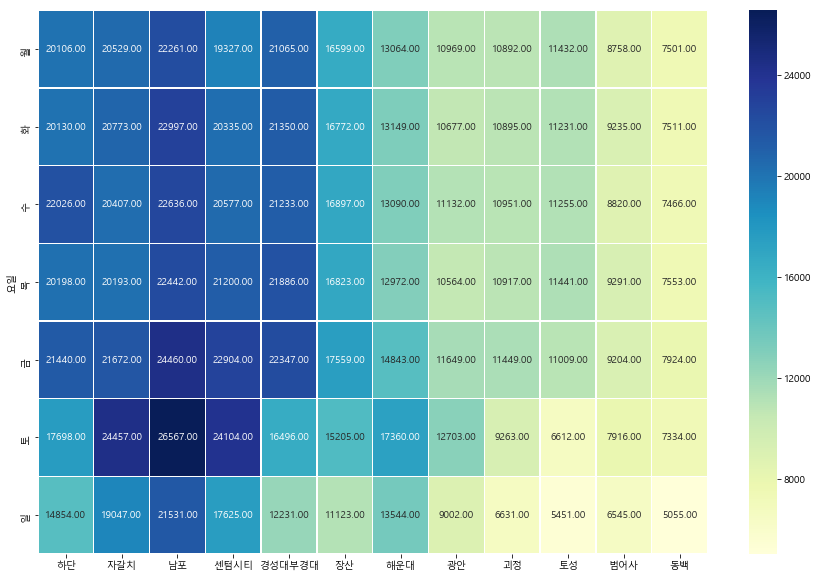

In [135]:
#요일 단위 시각화  : 요일 순서 정렬 필요
plt.figure(figsize=(15,10))
sns.heatmap(data = df_mgd, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')